<a href="https://colab.research.google.com/github/faheemZA/Lung_Cancer_Datascience_project2024/blob/main/Copy_of_Lung_Cancer_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This project investigates the relationship between various factors and lung cancer using a dataset of patient attributes, including demographics, lifestyle habits, and health conditions. It involves a detailed exploratory data analysis (EDA), featuring data cleaning, visualization, and statistical examination. Key factors examined include smoking, chronic disease, anxiety, fatigue, and physical symptoms such as coughing and shortness of breath, along with demographic attributes like gender and age.

The study highlights smoking as a significant risk factor for lung cancer, while other factors such as gender and chronic disease show weaker correlations. Through visualizations like heatmaps, histograms, and scatter plots, the project identifies patterns and imbalances in the data, such as the higher prevalence of lung cancer among older individuals and smokers. Relationships between lifestyle habits, peer pressure, and physical symptoms are also analyzed.

To conclude, predictive models including Random Forest and Logistic Regression are employed to classify patients as having lung cancer or not, achieving solid accuracy scores. The study emphasizes the importance of early identification of risk factors and symptoms for effective lung cancer diagnosis and prevention. The project demonstrates a comprehensive approach to data-driven insights in healthcare, leveraging visualization, analysis, and machine learning.








# Data Information

Attribute information:

* Gender: M(male), F(female)
* Age: Age of the patient
* Smoking: YES=2 , NO=1.
* Yellow fingers: YES=2 , NO=1.
* Anxiety: YES=2 , NO=1.
* Peer_pressure: YES=2 , NO=1.
* Chronic Disease: YES=2 , NO=1.
* Fatigue: YES=2 , NO=1.
* Allergy: YES=2 , NO=1.
* Wheezing: YES=2 , NO=1.
* Alcohol: YES=2 , NO=1.
* Coughing: YES=2 , NO=1.
* Shortness of Breath: YES=2 , NO=1.
* Swallowing Difficulty: YES=2 , NO=1.
* Chest pain: YES=2 , NO=1.
* Lung Cancer: YES , NO.

**Import Data Set**

In [ ]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload the file


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

# Load the dataset
df = pd.read_csv("survey lung cancer.csv")


# Exploratory Data Analysis (EDA)

In [ ]:
df.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
df.describe()


,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
df.isnull().sum()


,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [ ]:
df.shape

(309, 16)

In [ ]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()}")


GENDER: ['M' 'F']
LUNG_CANCER: ['YES' 'NO']


# Data Cleaning

In [ ]:
df = df.dropna()  # Drop rows with missing values (or handle them accordingly)


Business Questions?

1. How does Smoking influence on lung cancer?
2. What is the age distribution of patients with lung cancer?
3. Does gender affect the probability of having lung cancer?
4. Is there a correlation between chronic disease and lung cancer?
5. Do lifestyle factors like alcohol consumption and smoking correlate with lung cancer?
6. How do physical symptoms like coughing and shortness of breath relate to lung cancer diagnoses?
7. Is there a relationship between anxiety and lung cancer?
8. Does exposure to peer pressure correlate with smoking and, in turn, lung cancer?
9. we build a simple predictive model to classify patients as having lung cancer or not?


# Data Visualization

## Visualize data distribution for Categorical columns

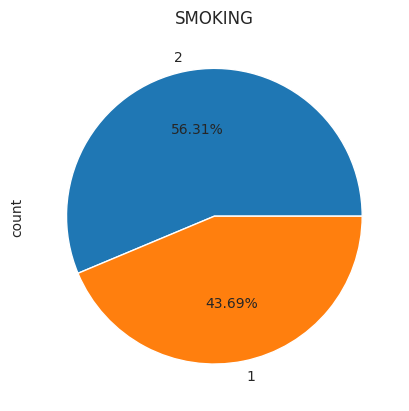

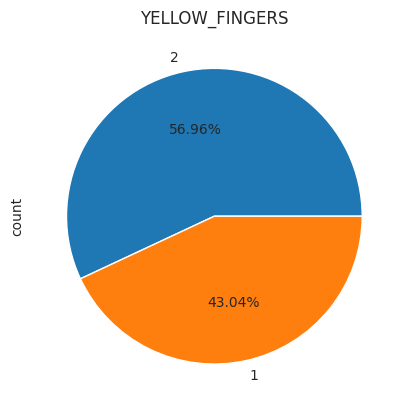

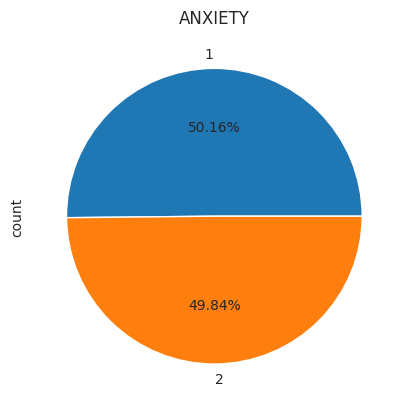

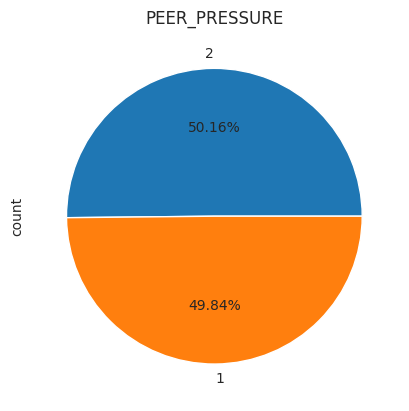

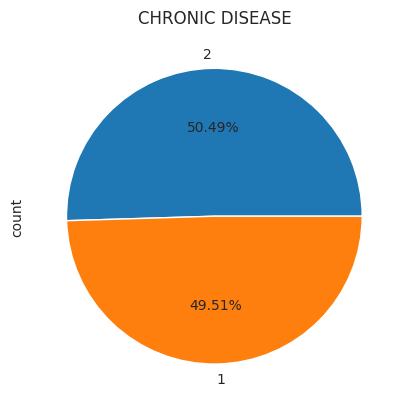

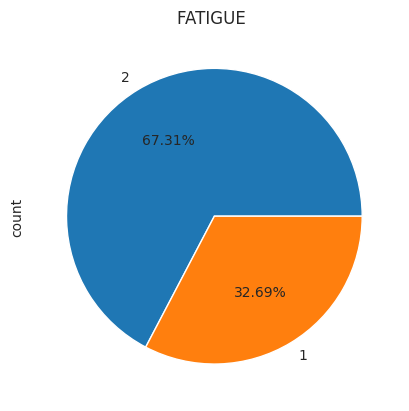

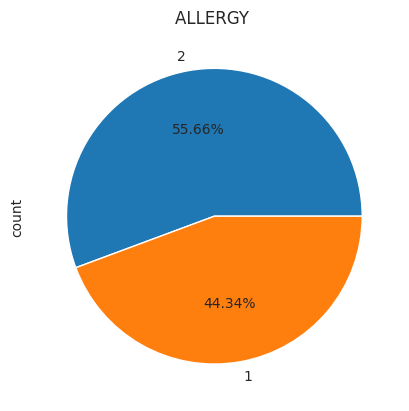

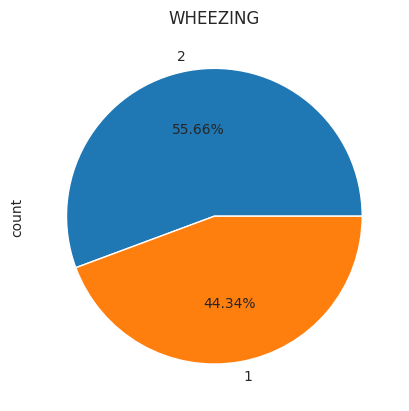

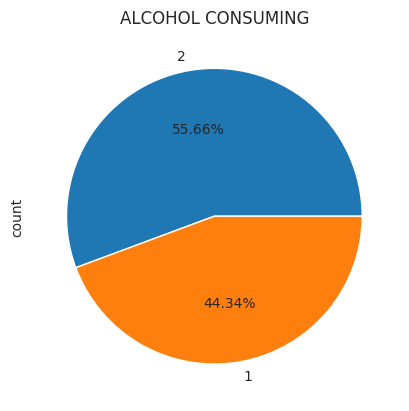

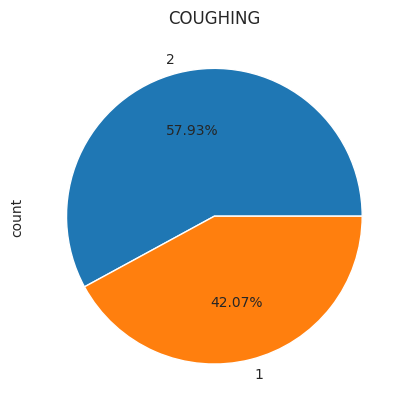

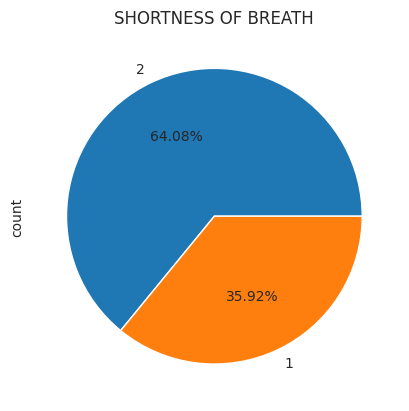

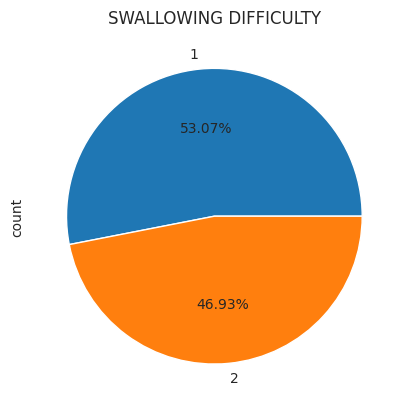

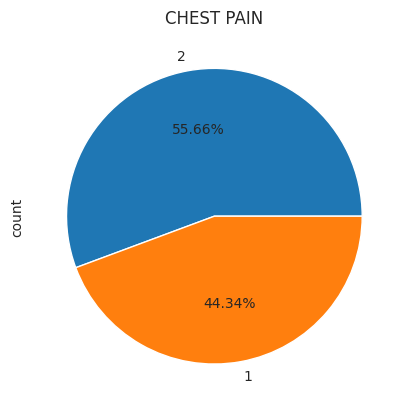

In [ ]:
for col in df.select_dtypes(include=int).columns[1:]:
    df[col].value_counts().plot(kind='pie', autopct="%.2f%%")
    plt.title(col)
    plt.show()

Fatigue, shortness of breath and coughing have imbalanced category distribution.

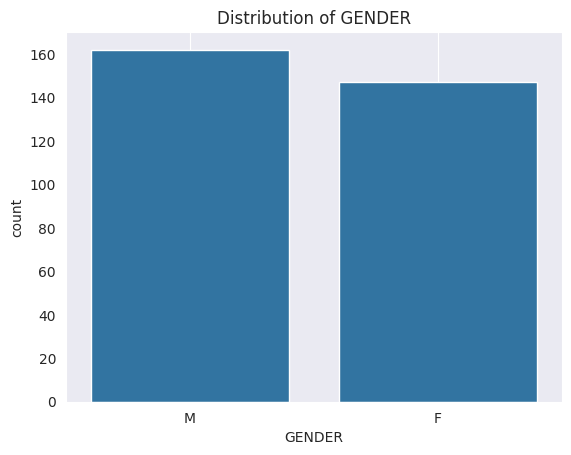

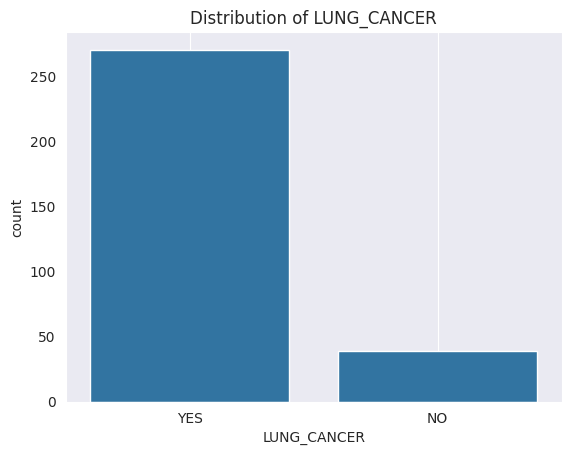

In [ ]:
for col in df.select_dtypes(include=['object']).columns:
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.grid()
    plt.show()


**Data-set is biased towards positive cases of lung cancer**

## Correlation Heatmap

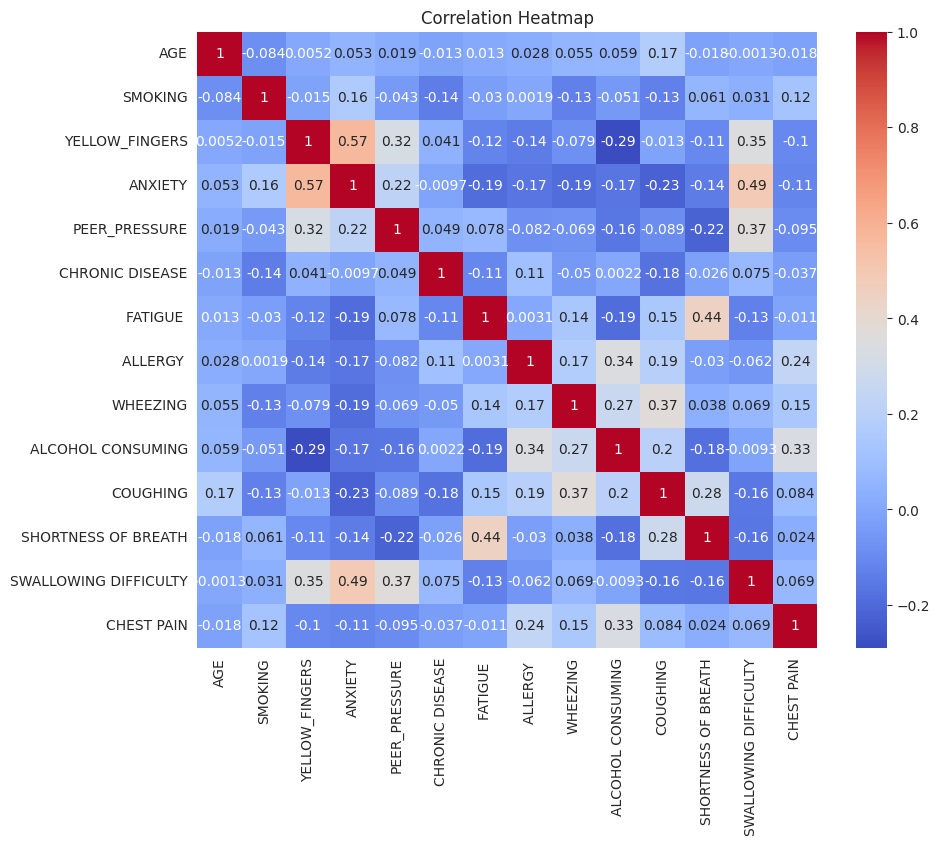

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Check if numeric_df is empty
if not numeric_df.empty:
    # Plot the correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("No numeric columns available for correlation heatmap.")


**What is the age distribution of patients with lung cancer?**

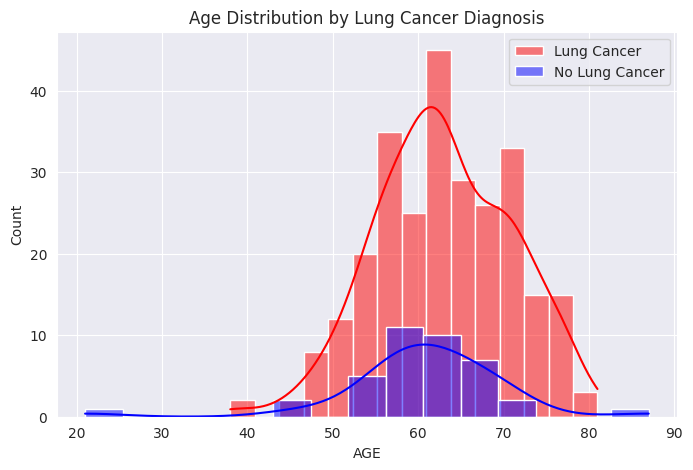

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df[df['LUNG_CANCER'] == 'YES'], x='AGE', bins=15, kde=True, color='red', label='Lung Cancer')
sns.histplot(data=df[df['LUNG_CANCER'] == 'NO'], x='AGE', bins=15, kde=True, color='blue', label='No Lung Cancer')
plt.legend()
plt.title("Age Distribution by Lung Cancer Diagnosis")
plt.show()

**How does Smoking influence on lung cancer?**

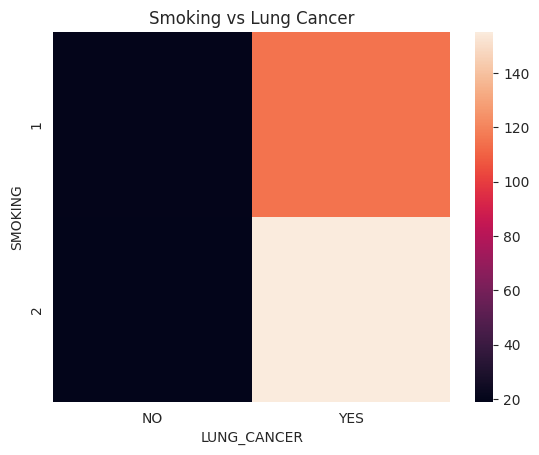

In [ ]:
df_smoke_cancer = df.pivot_table(index='SMOKING', columns='LUNG_CANCER', aggfunc='size', fill_value=0)

sns.heatmap(data=df_smoke_cancer)
plt.title("Smoking vs Lung Cancer")
plt.show()

The realtionship between smoking and lung cancer is not significant.

**Does gender affect the probability of having lung cancer?**

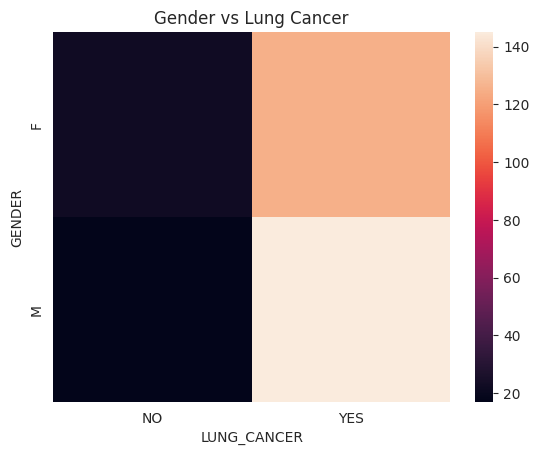

In [ ]:
df_gender_cancer = df.pivot_table(index='GENDER', columns='LUNG_CANCER', aggfunc='size', fill_value=0)

sns.heatmap(data=df_gender_cancer)
plt.title("Gender vs Lung Cancer")
plt.show()

The relationship between gender and lung cancer is not significant.

**Is there a correlation between chronic disease and lung cancer?**

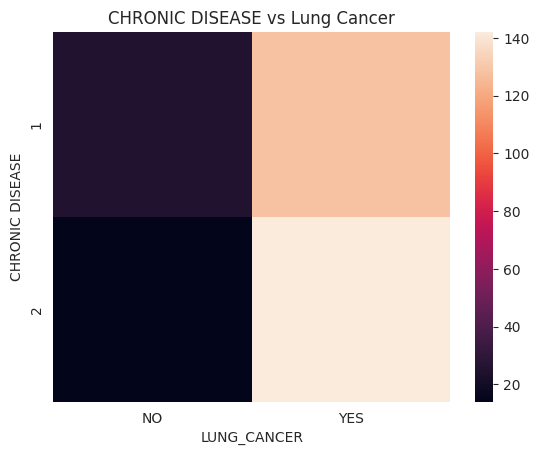

In [ ]:
df_chronic_cancer = df.pivot_table(index='CHRONIC DISEASE', columns='LUNG_CANCER', aggfunc='size', fill_value=0)

sns.heatmap(data=df_chronic_cancer)
plt.title("CHRONIC DISEASE vs Lung Cancer")
plt.show()

The relationship between chronic disease and lung cancer is non significant

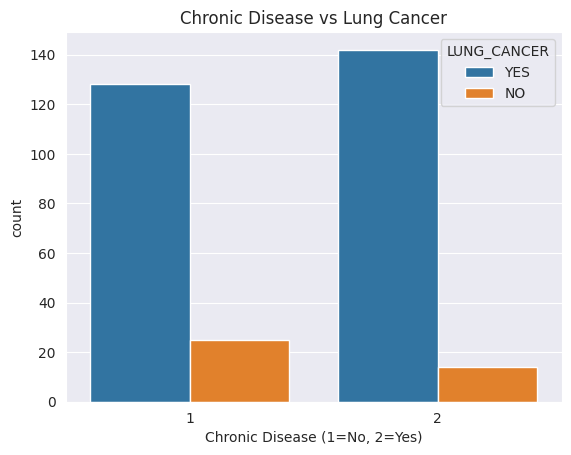

In [ ]:
sns.countplot(data=df, x='CHRONIC DISEASE', hue='LUNG_CANCER')
plt.title("Chronic Disease vs Lung Cancer")
plt.xlabel("Chronic Disease (1=No, 2=Yes)")
plt.show()

**Do lifestyle factors like alcohol consumption and smoking correlate with lung cancer?**

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

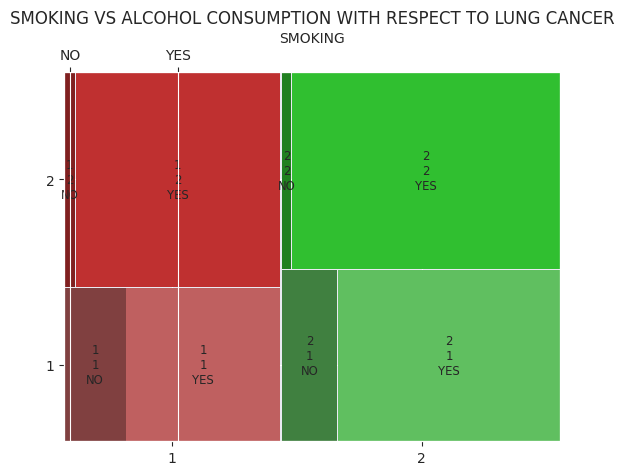

In [ ]:
temp = df.groupby(by=["SMOKING", "ALCOHOL CONSUMING", "LUNG_CANCER"]).size()

mosaic(temp)
plt.xlabel("SMOKING")
plt.ylabel("ALCOHOL CONSUMPTION")
plt.title("SMOKING VS ALCOHOL CONSUMPTION WITH RESPECT TO LUNG CANCER")
plt.show()

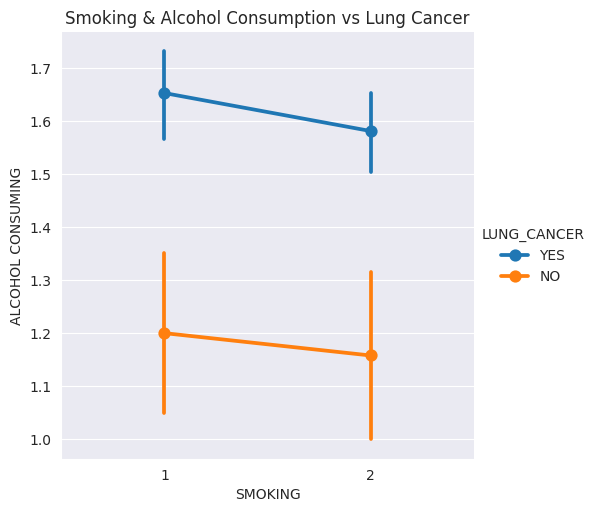

In [ ]:
sns.catplot(data=df, x='SMOKING', y='ALCOHOL CONSUMING', hue='LUNG_CANCER', kind='point')
plt.title("Smoking & Alcohol Consumption vs Lung Cancer")
plt.show()

**How do physical symptoms like coughing and shortness of breath relate to lung cancer diagnoses?**

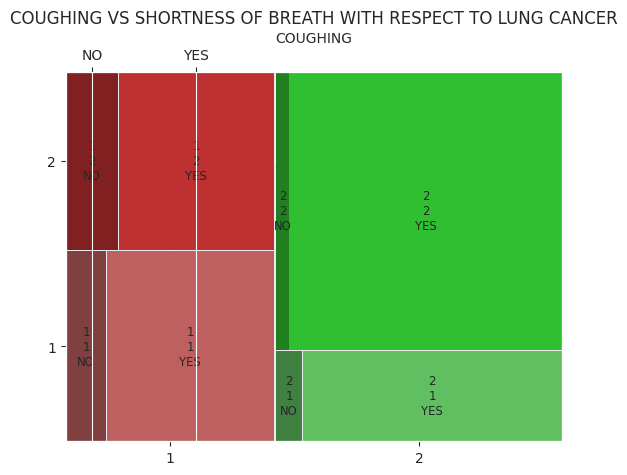

In [ ]:
temp = df.groupby(by=["COUGHING", "SHORTNESS OF BREATH", "LUNG_CANCER"]).size()

mosaic(temp)
plt.xlabel("COUGHING")
plt.ylabel("SHORTNESS OF BREATH")
plt.title("COUGHING VS SHORTNESS OF BREATH WITH RESPECT TO LUNG CANCER")
plt.show()

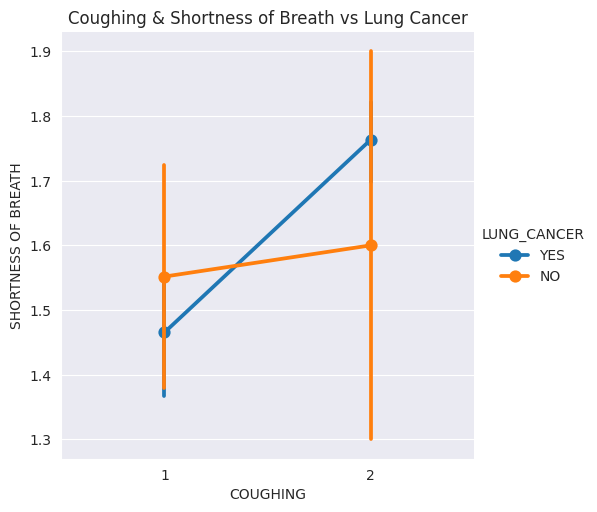

In [ ]:
sns.catplot(data=df, x='COUGHING', y='SHORTNESS OF BREATH', hue='LUNG_CANCER', kind='point')
plt.title("Coughing & Shortness of Breath vs Lung Cancer")
plt.show()

**Is there a relationship between anxiety and lung cancer?**

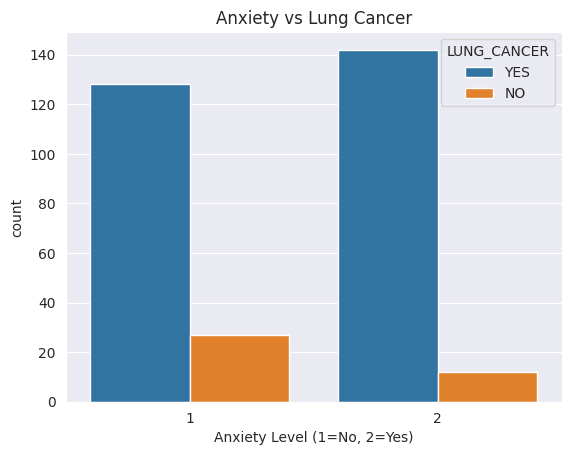

In [ ]:
sns.countplot(data=df, x='ANXIETY', hue='LUNG_CANCER')
plt.title("Anxiety vs Lung Cancer")
plt.xlabel("Anxiety Level (1=No, 2=Yes)")
plt.show()

**How does fatigue and chest pain differ between patients with and without lung cancer?**

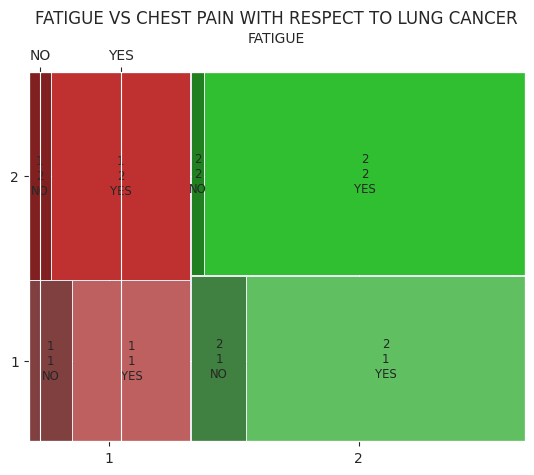

In [ ]:
temp = df.groupby(by=["FATIGUE ", "CHEST PAIN", "LUNG_CANCER"]).size()

mosaic(temp)
plt.xlabel("FATIGUE")
plt.ylabel("CHEST PAIN")
plt.title("FATIGUE VS CHEST PAIN WITH RESPECT TO LUNG CANCER")
plt.show()

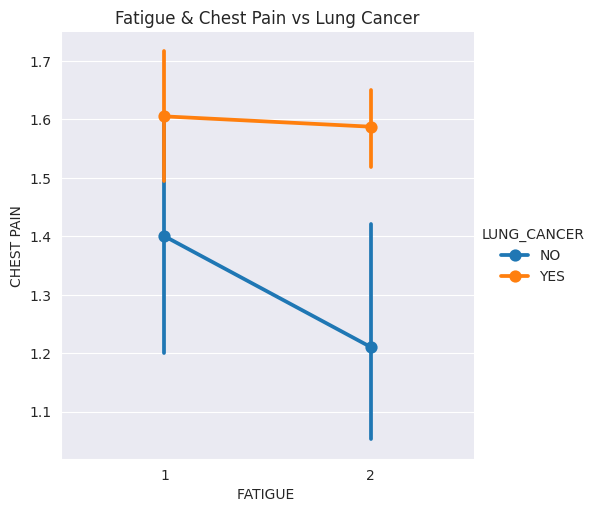

In [ ]:
sns.catplot(data=df, x='FATIGUE ', y='CHEST PAIN', hue='LUNG_CANCER', kind='point')
plt.title("Fatigue & Chest Pain vs Lung Cancer")
plt.show()

**Does exposure to peer pressure correlate with smoking and, in turn, lung cancer?**

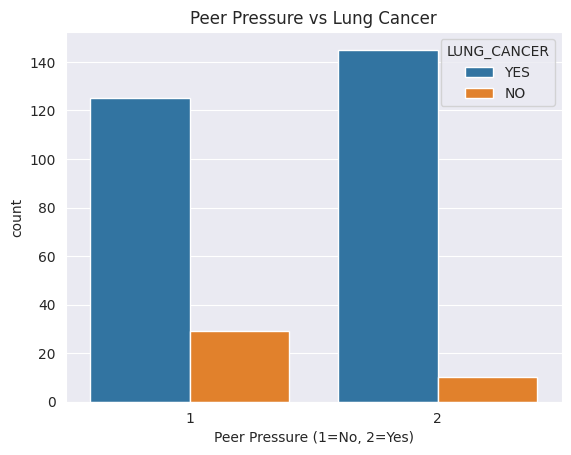

In [ ]:
sns.countplot(data=df, x='PEER_PRESSURE', hue='LUNG_CANCER')
plt.title("Peer Pressure vs Lung Cancer")
plt.xlabel("Peer Pressure (1=No, 2=Yes)")
plt.show()

**we build a simple predictive model to classify patients as having lung cancer or not?**


# Mchine Learning

## Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Prepare the data
X = df.drop(['LUNG_CANCER', 'GENDER'], axis=1)
y = df['LUNG_CANCER'].map({'NO': 0, 'YES': 1})  # Convert target to binary

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9838709677419355
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.98      1.00      0.99        60

    accuracy                           0.98        62
   macro avg       0.99      0.75      0.83        62
weighted avg       0.98      0.98      0.98        62



## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.967741935483871
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Conclusion


The project provides a comprehensive analysis of factors influencing lung cancer, based on patient demographics, health conditions, and lifestyle attributes. Smoking emerges as the most significant risk factor, strongly correlating with lung cancer diagnoses. While chronic diseases, fatigue, and symptoms like shortness of breath and coughing also relate to lung cancer, their influence is less pronounced

# Future Outcomes

Enhanced Early Detection Tools: The research can aid in developing predictive tools or apps using machine learning models to identify individuals at high risk of lung cancer based on lifestyle, demographics, and symptoms.

Targeted Awareness Campaigns: Insights from the analysis, such as the strong link between smoking and lung cancer, can inform more focused public health campaigns to reduce smoking prevalence and educate on early warning signs.

Personalized Healthcare Strategies: The findings can guide personalized interventions, enabling healthcare providers to monitor and manage high-risk individuals proactively, reducing the burden of lung cancer through preventive care.